In [2]:
import pandas as pd
#mengimpor dataset
header_list = ["text"]
data = pd.read_csv('D:/data2023/databersihs2.csv', names=header_list)
data


,text
0,biaya langka minyak goreng masyarakat indonesi...
1,minyak goreng curah subsidi perintah belum ada...
2,tidak perlu larang ekspor cpo daya bulog toko ...
3,minyak goreng tidak ada pasar ciampea bogor
4,anggota komisi vii dpr ri mulyanto perintah ja...
...,...
177,ngurus minyak goreng bahan pokok tidak bisa ur...
178,biaya minyak goreng tidak rapi rapi
179,warga beli warteg minyak goreng
180,warga barang beli warteg minyak goreng


In [5]:
import string
import re # import modul regular expression # regex for cleaning the tweets

def clean_text(reviews):
    all_reviews = list()
    lines = reviews["text"].values.tolist()
    for text in lines:
        text = re.sub("RT "," ", text)
        text = re.sub("@\\S+", " ", text)
        text = re.sub(r"http\S+", " ", text)
        text = re.sub("#\S+", " ", text)
        text = re.sub(r"\d+", " ", text) #menghapus angka dan reguler expression
        text = re.sub(r"[-!\"#$%&'()*+,./:;<=>?@\[\\\]_`{|}~ÃƒÂ¿]", " ", text)
        text = re.sub(r"\n", " ", text)
        text = re.sub(" +", " ",text)  
        text = text.strip()#remove whitespace    
        all_reviews.append(text)
    return all_reviews

all_reviews = clean_text(data)
print('Cleansing Data Result : \n') 
all_reviews[0:20]

Cleansing Data Result : 



['biaya langka minyak goreng masyarakat indonesia kelimpungan',
 'minyak goreng curah subsidi perintah belum ada kota malang dagang beli mohon sabar',
 'tidak perlu larang ekspor cpo daya bulog toko jaring distribusi minyak goreng bulog produsen',
 'minyak goreng tidak ada pasar ciampea bogor',
 'anggota komisi vii dpr ri mulyanto perintah jaga momentum turun biaya minyak goreng tuju het',
 'minyak goreng belum lihat taban',
 'aneh pas biaya liter nyarinya susah gilir biaya normal eh rak minyak goreng penuh',
 'asli minyak goreng mahal nyarinya susah tanpa minyak tidak bisa lemak riaa',
 'waras kah negara rakyat kalah kartel minyak goreng',
 'brand negara negara miskin susah minyak goreng tidak perlu sombong gaya rakyat asli',
 'tidak ada demo turunin harha minyak goreng',
 'perintah urus minyak goreng cabut izin produksi sawit kelar mata sipit kampung',
 'selamat negara lawak biaya minyak goreng mahal negara hasil minyak sawit',
 'biaya minyak goreng turun mudah mudah turun masyarakat

In [6]:
df=pd.DataFrame(all_reviews, columns=['text'])
data = pd.concat([df])
data

,text
0,biaya langka minyak goreng masyarakat indonesi...
1,minyak goreng curah subsidi perintah belum ada...
2,tidak perlu larang ekspor cpo daya bulog toko ...
3,minyak goreng tidak ada pasar ciampea bogor
4,anggota komisi vii dpr ri mulyanto perintah ja...
...,...
177,ngurus minyak goreng bahan pokok tidak bisa ur...
178,biaya minyak goreng tidak rapi rapi
179,warga beli warteg minyak goreng
180,warga barang beli warteg minyak goreng


In [7]:
from nltk.tokenize import word_tokenize
# ------ Tokenizing ---------
def word_tokenize_wrapper(sentiment_text):
    return word_tokenize(sentiment_text)

data['text'] = data['text'].apply(word_tokenize_wrapper)


print('Tokenizing Result : \n') 
print(data['text'].head(20))
print('\n\n\n')

Tokenizing Result : 

0     [biaya, langka, minyak, goreng, masyarakat, in...
1     [minyak, goreng, curah, subsidi, perintah, bel...
2     [tidak, perlu, larang, ekspor, cpo, daya, bulo...
3     [minyak, goreng, tidak, ada, pasar, ciampea, b...
4     [anggota, komisi, vii, dpr, ri, mulyanto, peri...
5                 [minyak, goreng, belum, lihat, taban]
6     [aneh, pas, biaya, liter, nyarinya, susah, gil...
7     [asli, minyak, goreng, mahal, nyarinya, susah,...
8     [waras, kah, negara, rakyat, kalah, kartel, mi...
9     [brand, negara, negara, miskin, susah, minyak,...
10    [tidak, ada, demo, turunin, harha, minyak, gor...
11    [perintah, urus, minyak, goreng, cabut, izin, ...
12    [selamat, negara, lawak, biaya, minyak, goreng...
13    [biaya, minyak, goreng, turun, mudah, mudah, t...
14                       [biaya, minyak, goreng, turun]
15    [belum, lagi, daerah, daerah, pencil, butuh, m...
16    [anggota, dpr, ri, biaya, cpo, dunia, merosot,...
17    [biaya, minyak, gore

In [9]:
import pandas as pd
#mengimpor dataset
header_list = ["text","label"]
data = pd.read_csv('D:/data2023/databersih.csv', names=header_list)
data

,text,label
0,biaya langka minyak goreng masyarakat indonesi...,0
1,minyak goreng curah subsidi perintah belum ada...,0
2,tidak perlu larang ekspor cpo daya bulog toko ...,1
3,minyak goreng tidak ada pasar ciampea bogor,1
4,anggota komisi vii dpr ri mulyanto perintah ja...,0
...,...,...
995,biaya langka minyak goreng timbul rugi ekonomi...,1
996,minyak goreng biaya sawit turun,1
997,warga barang beli warteg minyak goreng,0
998,perintah negara kembang produk red palm oil rp...,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from wordcloud import WordCloud, ImageColorGenerator

df = data[data["label"]==0]
df.head()

words = ' '.join(df['text'])
words

'biaya langka minyak goreng masyarakat indonesia kelimpungan minyak goreng curah subsidi perintah belum ada kota malang dagang beli mohon sabar anggota komisi vii dpr ri mulyanto perintah jaga momentum turun biaya minyak goreng tuju het aneh pas biaya liter nyarinya susah gilir biaya normal eh rak minyak goreng penuh asli minyak goreng mahal nyarinya susah tanpa minyak tidak bisa lemak riaa waras kah negara rakyat kalah kartel minyak goreng brand negara negara miskin susah minyak goreng tidak perlu sombong gaya rakyat asli tidak ada demo turunin harha minyak goreng perintah urus minyak goreng cabut izin produksi sawit kelar mata sipit kampung selamat negara lawak biaya minyak goreng mahal negara hasil minyak sawit biaya minyak goreng turun mudah mudah turun masyarakat tenang ayo disiplin prokes anggota dpr ri biaya cpo dunia merosot biaya minyak goreng indonesia biaya minyak goreng kota jambi juli rp ribu liter mendag klaim hasil kendali biaya minyak goreng minyakgoreng tumbuh ekonomi 

In [13]:
#Library untuk keperluan visualisasi WordCloud dan Generator warna visualnya
from wordcloud import WordCloud, ImageColorGenerator

In [14]:
df = data[data["label"]==0] #menampilkan data dengan prediksi 0 atau negative
df.head()
words = ' '.join(df['text']) #gabungkan semua komentar atau kata kata menjadi satu kesatuan kalimat

In [15]:
"""
setting tampilan WordCloud yang mencakup warna latar belakang, maksimal kata kata yang ditampilkan, maksimal ukuran gambar,
ukuran pengacakan gambar, lebar, tinggi, dan mengenerate berdasarkan variabel words yang sudah didefinisikan sebelumnya
"""
wc_negative = WordCloud(background_color="white",
               max_words=50, max_font_size=256,
               random_state=42, width=1000,
               height=1000).generate(str(words))

In [16]:
"""
Bagian ini digunakan untuk pengaturan function warna yang mencakup kata, ukuran huruf, posisi, dan arah penempatan huruf, serta
warna yang akan digunakan dan pengacakan jenis warna yang ditampilkan
"""
import random
def negative(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(362, 82%%, %d%%)" % random.randint(30, 70) #menghasilkan jenis intensitas kecerahan warna secara random untuk 
                                                            #kata2 yang ditampilan

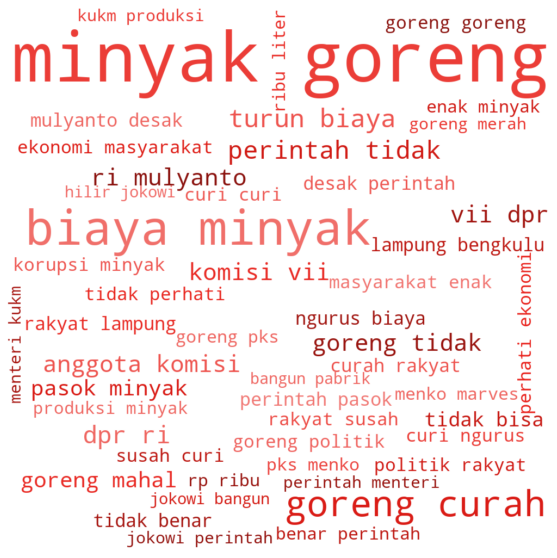

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(wc_negative.recolor
           (color_func=negative, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()
#wordcloud.to_file("Negatif.png")

In [18]:
df = data[data["label"]==1]
df.head()

,text,label
2,tidak perlu larang ekspor cpo daya bulog toko ...,1
3,minyak goreng tidak ada pasar ciampea bogor,1
5,minyak goreng belum lihat taban,1
14,biaya minyak goreng turun,1
15,belum lagi daerah daerah pencil butuh minyak g...,1


In [19]:
words = ' '.join(df['text'])

In [20]:
wc_positive = WordCloud(background_color="white",
               max_words=50, max_font_size=256,
               random_state=42, width=1000,
               height=1000).generate(str(words))

In [21]:
import random
def positive(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(200, 82%%, %d%%)" % random.randint(30, 70)

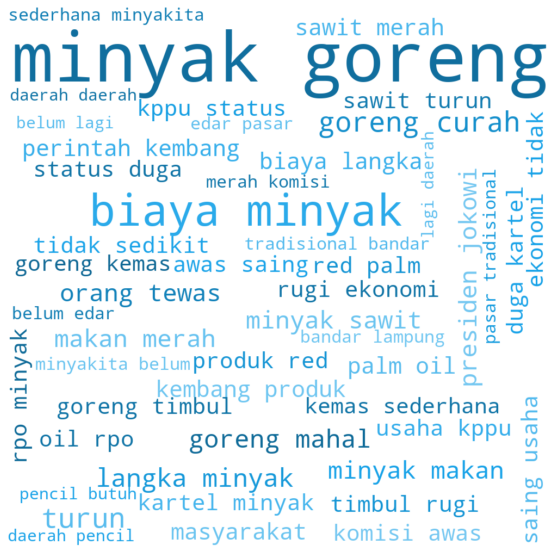

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(wc_positive.recolor
           (color_func=positive, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()
#wordcloud.to_file("Positif.png")

In [23]:
import pandas as pd
#mengimpor dataset
header_list = ["text","label"]
data = pd.read_csv('D:/data2023/databersih.csv', names=header_list)
data

,text,label
0,biaya langka minyak goreng masyarakat indonesi...,0
1,minyak goreng curah subsidi perintah belum ada...,0
2,tidak perlu larang ekspor cpo daya bulog toko ...,1
3,minyak goreng tidak ada pasar ciampea bogor,1
4,anggota komisi vii dpr ri mulyanto perintah ja...,0
...,...,...
995,biaya langka minyak goreng timbul rugi ekonomi...,1
996,minyak goreng biaya sawit turun,1
997,warga barang beli warteg minyak goreng,0
998,perintah negara kembang produk red palm oil rp...,0


In [24]:
words_in_tweet = [tweet.lower().split() for tweet in data["text"]]
words_in_tweet[:2]

[['biaya',
  'langka',
  'minyak',
  'goreng',
  'masyarakat',
  'indonesia',
  'kelimpungan'],
 ['minyak',
  'goreng',
  'curah',
  'subsidi',
  'perintah',
  'belum',
  'ada',
  'kota',
  'malang',
  'dagang',
  'beli',
  'mohon',
  'sabar']]

In [25]:
import itertools
import collections
# List of all words across tweets
all_words = list(itertools.chain(*words_in_tweet))

# Create counter
counts_all_words = collections.Counter(all_words)

counts_all_words.most_common(15)

[('minyak', 945),
 ('goreng', 889),
 ('biaya', 418),
 ('perintah', 207),
 ('tidak', 170),
 ('turun', 141),
 ('curah', 116),
 ('jokowi', 80),
 ('belum', 79),
 ('merah', 72),
 ('sawit', 71),
 ('daerah', 70),
 ('pasar', 67),
 ('masyarakat', 63),
 ('cpo', 60)]

In [26]:
clean_tweets_all_world = pd.DataFrame(counts_all_words.most_common(15),
                             columns=['words', 'count'])

clean_tweets_all_world.head()

,words,count
0,minyak,945
1,goreng,889
2,biaya,418
3,perintah,207
4,tidak,170


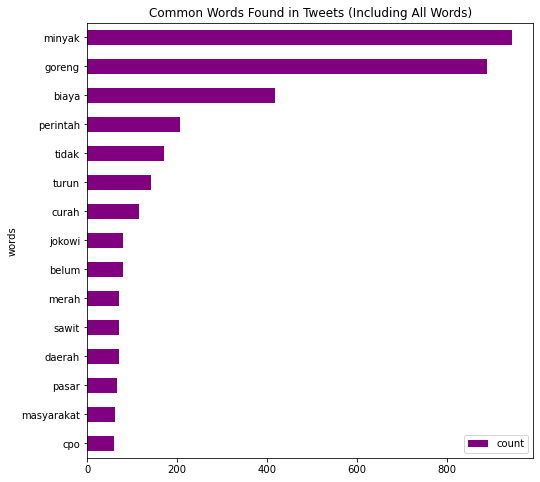

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_all_world.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

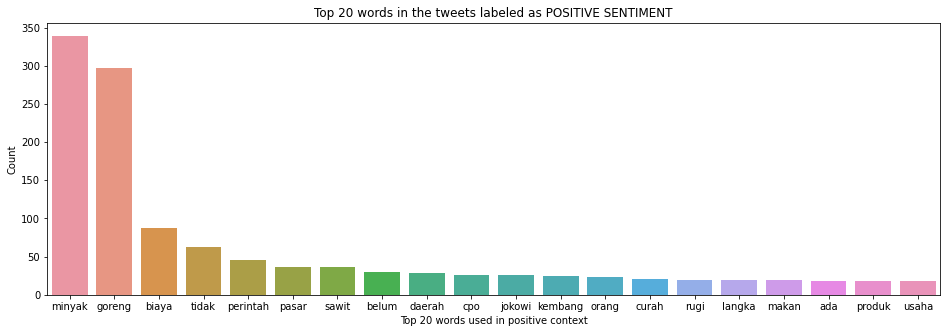

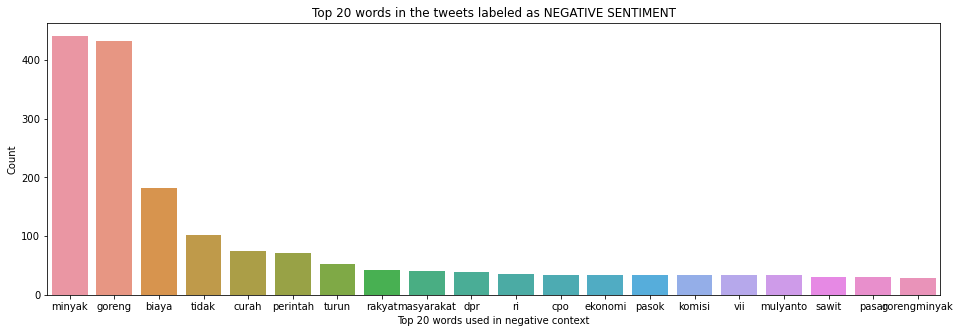

In [28]:
import nltk

pos = data[data['label'] == 1]
neg = data[data['label'] == 0]
pos_sentiment_words = ''.join([word for word in pos['text']]) #words from the tweets that are positive
neg_sentiment_words = ''.join([word for word in neg['text']]) ##words from the tweets that are negative

#top 20 words on positive tweets
list_pos_words = [ x for x in pos_sentiment_words.split()] #list of positive sentiment words
freq_dis_pos = nltk.FreqDist(list_pos_words) #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_pos.keys()), 'Count': list(freq_dis_pos.values())}) #data frame of words and count

# selecting top 20 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel= 'Top 20 words used in positive context')
plt.title("Top 20 words in the tweets labeled as POSITIVE SENTIMENT")
plt.show()

#top 20 words on negative tweets
list_neg_words = [ x for x in neg_sentiment_words.split()]   #list of positive sentiment words
freq_dis_pos = nltk.FreqDist(list_neg_words)   #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_pos.keys()), 'Count': list(freq_dis_pos.values())})  #data frame of words and count

# selecting top 20 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Top 20 words used in negative context')
plt.title("Top 20 words in the tweets labeled as NEGATIVE SENTIMENT")
plt.show()